<a href="https://colab.research.google.com/github/sobit-nep/Prachalit-script-character-recognition-using-CNN/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOAD PACKAGES

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## CREATE DATASET

In [91]:
import os
path = "/content/drive/MyDrive/consonants/train/"
files = os.listdir(path)[:3]
print(files)
classes={'KA':0 ,'KHA':1 , 'GA':2}

['KA', 'KHA', 'GA']


In [94]:
import cv2
X= []
Y= []
for cl in classes:
    pth = path+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        new_img = cv2.resize(img, (28,28))
        X.append(new_img)
        Y.append(classes[cl])
print("dataset created successfully!")

dataset created successfully!


In [95]:
pd.Series(Y).value_counts()

0    85
1    85
2    85
dtype: int64

In [96]:
#print(type(X))
X= np.array(X)
Y= np.array(Y)
#print(type(X))
print(X.shape)

(255, 28, 28)


## ANALYZE DATA

1


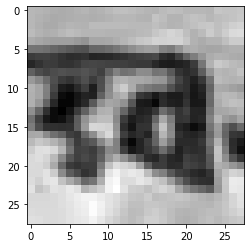

In [71]:
plt.imshow(X[121], cmap="gray")
print(Y[121])

In [72]:
X[0].shape

(28, 28)

## PREPARE DATA

In [97]:
X_new = X. reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(255, 784)
(255,)


In [98]:
print(X. shape)
print(X.ndim)
print(X_new.ndim)

(255, 28, 28)
3
2


SPLIT DATA


In [99]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new,Y,test_size=.20, random_state=10)

In [100]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(204, 784) (204,)
(51, 784) (51,)


FEATURE SCALING


In [101]:
print(xtrain.max())
print(xtest.max())
x_train = xtrain/255
x_test = xtest/255
print(x_train.max())
print(x_test.max())

255
255
1.0
1.0


FEATURE SELECTION:PCA

In [102]:
from sklearn.decomposition import PCA

In [103]:
print(x_train.shape, x_test.shape)
pca = PCA(.98)
xtrain = pca.fit_transform(x_train)
xtest = pca.transform(x_test)
print(xtrain.shape, xtest.shape)
print(pca.n_components)
print(pca.n_features_)

(204, 784) (51, 784)
(204, 75) (51, 75)
0.98
784


In [104]:
ytest[:10]

array([1, 0, 1, 2, 1, 1, 0, 0, 0, 2])

TRAIN MODEL

In [106]:
log = LogisticRegression()
log.fit(xtrain, ytrain)

LogisticRegression()

PREDICTION

In [108]:
tr_pred = log.predict(xtrain)
ts_pred = log.predict(xtest)

EVALUATION

In [109]:
print("Training Score", accuracy_score(ytrain,tr_pred))
print("Testing Score", accuracy_score(ytest,ts_pred))

Training Score 0.9901960784313726
Testing Score 0.9019607843137255


TEST MODEL

2


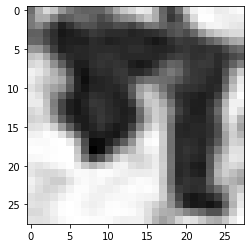

In [112]:
plt.imshow(x_test[20].reshape(28,28), cmap='gray')
print(ytest[20])

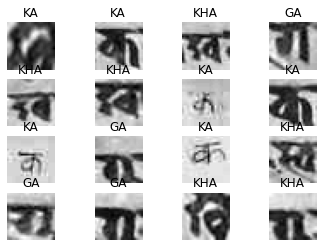

In [116]:
decode = {0:'KA',1:'KHA',2:'GA'}
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(decode[ts_pred[i]])
    plt.axis('off')

In [117]:
np.where(ts_pred!=ytest)
d = pd.DataFrame({'Actual' :ytest, 'Prediction': ts_pred})
d[d['Actual']!=d['Prediction']]

,Actual,Prediction
0,1,0
15,2,1
22,2,1
33,1,0
44,1,0
